# DNN 구축과 훈련 실습

## 라이브러리 불러오기

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
## 라이브러리 임포트
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


## 하이퍼 파라미터

In [3]:
learning_rate = 0.001
training_epochs = 10
batch_size = 128
n_class = 10

## MNIST 데이터셋

In [4]:
## MNIST Dataset 
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Fashion MNIST Dataset 
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터셋 불러오기

In [5]:
## MNIST dataset load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

## 연습1: 데이터셋 불러오기

In [6]:
## train_images, train_labels의 type 확인
type(train_images), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [7]:
## train_images, train_labels의 shape 확인
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [8]:
## test_images, test_labels의 shape 확인
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [9]:
## training set의 각 class 별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [10]:
## test set의 각 class 별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

In [11]:
## train dataset, test dataset의 개수 저장
n_train = train_images.shape[0]
n_test = test_images.shape[0]
print('train data 수: ', n_train)
print(' test data 수: ', n_test)

train data 수:  60000
 test data 수:  10000


In [20]:
print(train_labels[2])

4


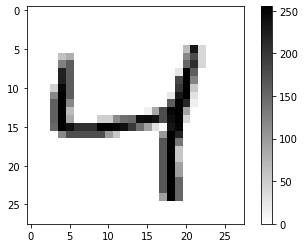

In [21]:
## train_images의 0번 image 화면에 출력
plt.figure()
plt.imshow(train_images[2], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

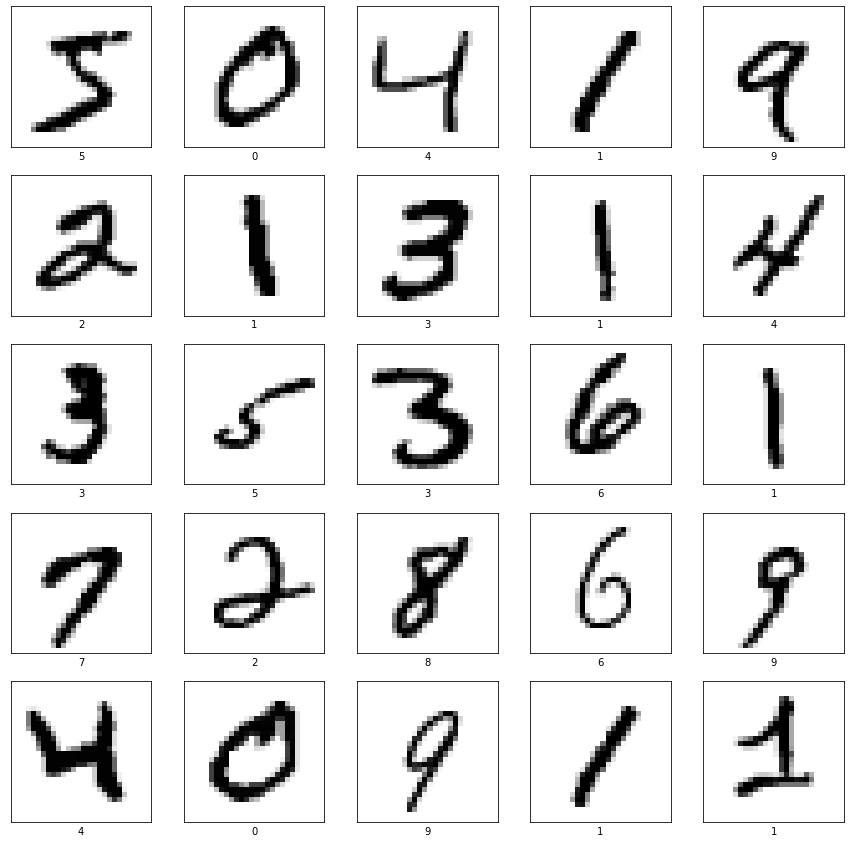

In [22]:
## 25개의 train image와 label 화면에 출력
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [23]:
## image를 0~1사이 값으로 만들기 위하여 255로 나누어줌
print('<nomalizing pixel values>')
print('before: ', train_images[0,13,12:17])
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
print('after:  ', train_images[0,13,12:17])
print()

<nomalizing pixel values>
before:  [ 35 241 225 160 108]
after:   [0.13725491 0.94509804 0.88235295 0.627451   0.42352942]



## 연습2: 원핫인코딩

In [24]:
## one-hot encodin을 완성하라.
## to_categorical(레이블, n_class)을 사용  => categorical_crossentropy로 매치하는 것 기억  (정수: sparse_categorial_crossentropy
print('<one-hot encoding>')
print('before: ', train_labels[:5])
train_labels = to_categorical(train_labels, n_class)
test_labels =  to_categorical(test_labels, n_class)
print('after:  ', train_labels[:5])

<one-hot encoding>
before:  [5 0 4 1 9]
after:   [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 연습3: 데이터셋 구성

In [28]:
## dataset 구성
# from_tensor_slices, shuffe, batch, repeat를 사용해보라. 
# 참조 
#1. repeat(step_n) : 원하는 epoch 수를 넣을 수 있다. 아무런 파라미터를 주지 않는다면 iteration이 무제한으로 돌아간다.
#2. shuffle(1000) : 한번 epoch이 돌고나서 랜덤하게 섞을 것인지 정한다.

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=100000).batch(batch_size).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

## 신경망으로 구현한 로지스틱 회귀 모델

## 연습 4: 신경망 로지스틱 회귀 모델 구축

In [29]:
# 힌트: Dense, 클래스 10개, softmax를 사용해라.
def create_lr_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(10, activation='softmax')) #<= 로지스틱 함수를 만들어 보라.
    return model

In [31]:
lr_model = create_lr_model()
lr_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# 연습 5. 모델 컴파일

## 모델 컴파일 (최적화와 손실함수) 

In [32]:
# 다음을 사용해 컴파일을 완성하라
# keras.optimizers.Adam, learning_rate, 손실함수는 categorical_crossentropy, 성과척도는 accaury로 시도해보라
# 최적화(optimizer), 손실함수(loss), 성과척도(metrics) 정의하는 것
lr_model.compile(optimizer=keras.optimizers.Adam(learning_rate), 
                 loss='categorical_crossentropy', 
                 metrics=['accuracy']            
                )

## 훈련(학습)

In [33]:
steps_per_epoch = n_train//batch_size  #model.fit()에서 사용한다.
validation_steps = n_test//batch_size
print('number of steps per epoch: ', steps_per_epoch)
print('number of steps per validation: ', validation_steps) 

number of steps per epoch:  468
number of steps per validation:  78


In [34]:
## traing 전에 loss 및 validation accuracy 확인
# test_dataset을 사용해 보라
lr_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 2ms/step - loss: 2.4632 - accuracy: 0.0402


[2.463182210922241, 0.04016426205635071]

## 연습 6. 모델 학습 

In [37]:
# 다음과 lr_model.fit() 함수를 이용해 아래 학습함수를 완성하라
# 힌트:  train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
# validation_data=test_dataset, validation_steps=validation_steps
history =lr_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch,
                       validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 2s 3ms/step - loss: 0.6838 - accuracy: 0.8302 - val_loss: 0.3846 - val_accuracy: 0.9024
Epoch 2/10
468/468 [==============================] - 2s 4ms/step - loss: 0.3623 - accuracy: 0.9026 - val_loss: 0.3195 - val_accuracy: 0.9128
Epoch 3/10
468/468 [==============================] - 2s 3ms/step - loss: 0.3191 - accuracy: 0.9119 - val_loss: 0.2978 - val_accuracy: 0.9168
Epoch 4/10
468/468 [==============================] - 2s 4ms/step - loss: 0.2997 - accuracy: 0.9173 - val_loss: 0.2861 - val_accuracy: 0.9210
Epoch 5/10
468/468 [==============================] - 2s 4ms/step - loss: 0.2875 - accuracy: 0.9201 - val_loss: 0.2772 - val_accuracy: 0.9231
Epoch 6/10
468/468 [==============================] - 2s 4ms/step - loss: 0.2798 - accuracy: 0.9223 - val_loss: 0.2740 - val_accuracy: 0.9243
Epoch 7/10
468/468 [==============================] - 2s 4ms/step - loss: 0.2744 - accuracy: 0.9240 - val_loss: 0.2719 - val_accuracy: 0.9246
Epoch 

In [38]:
## traing 후에 loss 및 validation accuracy 확인: 훈련이전과 비교
# test_dataset을 사용해 보라
lr_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 4ms/step - loss: 0.2681 - accuracy: 0.9255


[0.2680811882019043, 0.9254807829856873]

## 학습 결과 확인

In [39]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)  # 손글씨 그림 그리기

    predicted_label = np.argmax(predictions_array)  # 레이블 예측
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array) # 레이블 예측
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

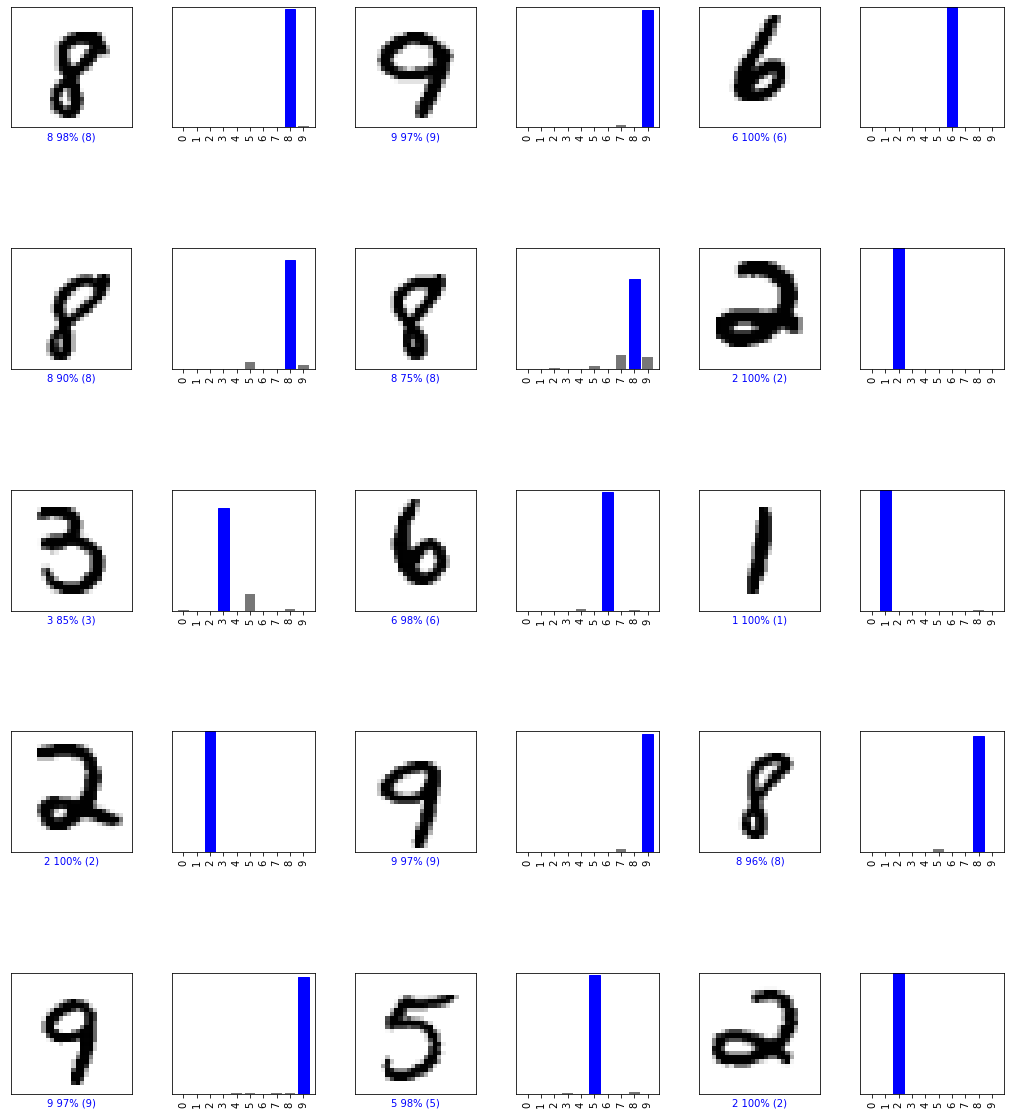

In [40]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = lr_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())  # images.numpy()를 imshow로 그린다.
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

In [41]:
 predictions = lr_model(images, training=False)

In [44]:
 predictions = lr_model.predict(images)

In [45]:
predictions[0]

array([2.73873206e-06, 4.44469697e-06, 3.10926727e-04, 5.25590638e-03,
       1.86862653e-05, 4.74443892e-03, 4.89926492e-07, 2.23479132e-04,
       9.78334427e-01, 1.11044245e-02], dtype=float32)

## 3층 DNN을 구축해보자

## 연습 7: 3층 DNN 구축

In [48]:
# 다음의 3층 DNN을 완성하라.
# input_shape=(28,28)를 사용하고
# 은닉층의 유닛을 256, 128로 하고 마지막 전결합 출력 유닛을 10로 하는 3층 신경망을 완성하라. 
# 은닉층의 활성화 함수는 relu 전결합층의 활성화함수는 softmax를 사용하라.
def create_mlp_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [49]:
mlp_model = create_mlp_model()
mlp_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [50]:
## 모델 컴파일
mlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [51]:
## traing 전에 loss 및 validation accuracy 확인
mlp_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 1s 8ms/step - loss: 2.2931 - accuracy: 0.1321


[2.2930729389190674, 0.13211138546466827]

In [52]:
## 훈련
history = mlp_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 4s 10ms/step - loss: 0.2704 - accuracy: 0.9233 - val_loss: 0.1323 - val_accuracy: 0.9584
Epoch 2/10
468/468 [==============================] - 4s 8ms/step - loss: 0.1045 - accuracy: 0.9686 - val_loss: 0.0893 - val_accuracy: 0.9725
Epoch 3/10
468/468 [==============================] - 3s 7ms/step - loss: 0.0660 - accuracy: 0.9803 - val_loss: 0.0915 - val_accuracy: 0.9719
Epoch 4/10
468/468 [==============================] - 3s 7ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0737 - val_accuracy: 0.9774
Epoch 5/10
468/468 [==============================] - 3s 7ms/step - loss: 0.0378 - accuracy: 0.9878 - val_loss: 0.0709 - val_accuracy: 0.9771
Epoch 6/10
468/468 [==============================] - 3s 7ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0650 - val_accuracy: 0.9815
Epoch 7/10
468/468 [==============================] - 4s 7ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0809 - val_accuracy: 0.9763
Epoch

# 학습결과 확인

In [53]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

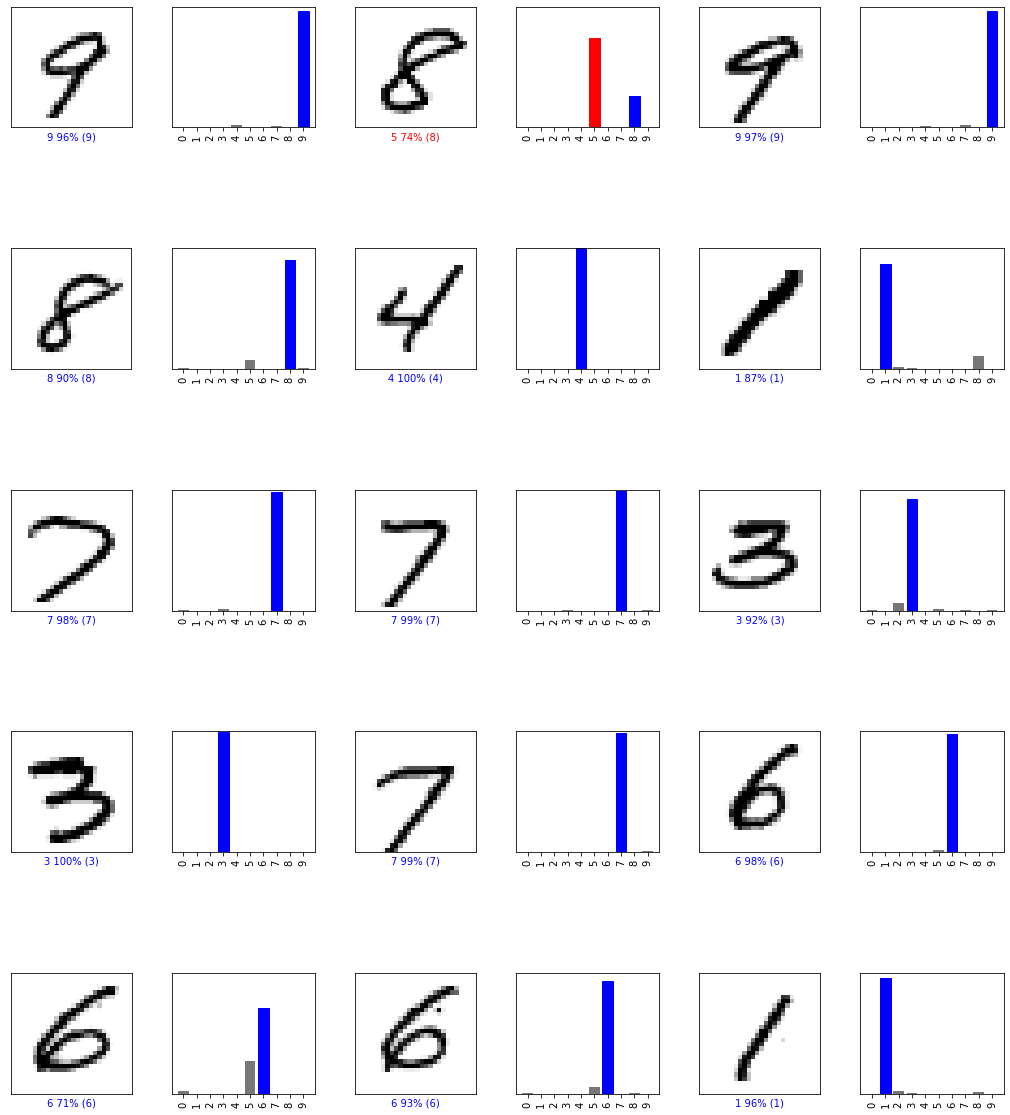

In [54]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = lr_model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

## 이제 5층 DNN을 구축해보자

## 연습 8:  5층 DNN 구축

In [55]:
# 다음의 5층 DNN을 완성하라.
# input_shape=(28,28)를 사용하고
# 2개 은닉층의 유닛을 각각 256, 128로 하고 마지막 전결합 출력 유닛을 10로 하는 5층 신경망을 완성하라. 
# 은닉층의 활성화 함수는 relu 전결합층의 활성화함수는 softmax를 사용하라.

def create_dmlp_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [56]:
dmlp_model = create_dmlp_model()
dmlp_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [57]:
## 모델 컴파일
dmlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [58]:
## traing 전에 loss 및 validation accuracy 확인
dmlp_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 4ms/step - loss: 2.3051 - accuracy: 0.1505


[2.3051295280456543, 0.15054085850715637]

In [59]:
## 훈련
history = dmlp_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 5s 11ms/step - loss: 0.2621 - accuracy: 0.9239 - val_loss: 0.1152 - val_accuracy: 0.9641
Epoch 2/10
468/468 [==============================] - 7s 16ms/step - loss: 0.0964 - accuracy: 0.9705 - val_loss: 0.0964 - val_accuracy: 0.9692
Epoch 3/10
468/468 [==============================] - 8s 17ms/step - loss: 0.0642 - accuracy: 0.9794 - val_loss: 0.1024 - val_accuracy: 0.9711
Epoch 4/10
468/468 [==============================] - 9s 20ms/step - loss: 0.0477 - accuracy: 0.9841 - val_loss: 0.0768 - val_accuracy: 0.9771
Epoch 5/10
468/468 [==============================] - 10s 22ms/step - loss: 0.0356 - accuracy: 0.9882 - val_loss: 0.0818 - val_accuracy: 0.9756
Epoch 6/10
468/468 [==============================] - 6s 14ms/step - loss: 0.0322 - accuracy: 0.9895 - val_loss: 0.0933 - val_accuracy: 0.9729
Epoch 7/10
468/468 [==============================] - 5s 11ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0858 - val_accuracy: 0.979

## 드롭 아웃 (Drop-out)을 추가해보자

## 연습 9: 드롭아웃 추가

In [60]:
# 5층 DNN의 은닉층의 출력 다음 단계에 Dropout을 추가하라. kera.layers.Dropout(drop_rate)
drop_rate = 0.2

def create_do_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [61]:
do_model = create_do_model()
do_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [62]:
## 모델 컴파일
do_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [63]:
## traing 전에 loss 및 validation accuracy 확인
do_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 4ms/step - loss: 2.3196 - accuracy: 0.1036


[2.3195600509643555, 0.10356570780277252]

In [64]:
## 훈련
history = do_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 7s 15ms/step - loss: 0.3822 - accuracy: 0.8821 - val_loss: 0.1282 - val_accuracy: 0.9604
Epoch 2/10
468/468 [==============================] - 8s 17ms/step - loss: 0.1527 - accuracy: 0.9562 - val_loss: 0.0916 - val_accuracy: 0.9736
Epoch 3/10
468/468 [==============================] - 8s 18ms/step - loss: 0.1147 - accuracy: 0.9669 - val_loss: 0.0872 - val_accuracy: 0.9748
Epoch 4/10
468/468 [==============================] - 11s 23ms/step - loss: 0.0924 - accuracy: 0.9730 - val_loss: 0.0842 - val_accuracy: 0.9746
Epoch 5/10
468/468 [==============================] - 12s 25ms/step - loss: 0.0798 - accuracy: 0.9764 - val_loss: 0.0828 - val_accuracy: 0.9770 - loss:
Epoch 6/10
468/468 [==============================] - 6s 13ms/step - loss: 0.0694 - accuracy: 0.9793 - val_loss: 0.0779 - val_accuracy: 0.9769
Epoch 7/10
468/468 [==============================] - 6s 12ms/step - loss: 0.0628 - accuracy: 0.9812 - val_loss: 0.0755 - val_accura

## 가중치 감쇠: L2 규제화 (Weight Decay: L2 Regulrarization)를 적용해보자

## 연습 10: 가중치 감쇠 규제화

In [68]:
# 다음을 이용해서 5층 DNN의 규제화를 완성하라. (Dropout 대신 규제화를 사용한다.)
# kernel_regularizer=keras.regularizers.l2(reg_weight,
# bias_regularizer=keras.regularizers.l2(reg_weight
reg_weight = 0.00002

def create_l2r_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256, activation='relu',
                                kernel_regularizer=keras.regularizers.l2(reg_weight),
                                bias_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(256, activation='relu',
                                kernel_regularizer=keras.regularizers.l2(reg_weight),
                                bias_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(128, activation='relu',
                                kernel_regularizer=keras.regularizers.l2(reg_weight),
                                bias_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(128, activation='relu',
                                kernel_regularizer=keras.regularizers.l2(reg_weight),
                                bias_regularizer=keras.regularizers.l2(reg_weight)))
    model.add(keras.layers.Dense(10, activation='softmax',
                                kernel_regularizer=keras.regularizers.l2(reg_weight),
                                bias_regularizer=keras.regularizers.l2(reg_weight)))
    return model

In [69]:
l2r_model = create_l2r_model()
l2r_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [43]:
## 모델 컴파일
l2r_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [44]:
## traing 전에 loss 및 validation accuracy 확인
l2r_model.evaluate(test_dataset, steps=validation_steps)

100/100 [==============================] - 0s 3ms/step - loss: 2.3412 - accuracy: 0.0761


[2.341244697570801, 0.07609999924898148]

In [45]:
## 훈련
history = l2r_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2606 - accuracy: 0.9271 - val_loss: 0.1267 - val_accuracy: 0.9661
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1145 - accuracy: 0.9706 - val_loss: 0.1073 - val_accuracy: 0.9728
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0864 - accuracy: 0.9795 - val_loss: 0.1153 - val_accuracy: 0.9721
Epoch 4/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0740 - accuracy: 0.9830 - val_loss: 0.1150 - val_accuracy: 0.9728
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0640 - accuracy: 0.9869 - val_loss: 0.1079 - val_accuracy: 0.9752
Epoch 6/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0583 - accuracy: 0.9888 - val_loss: 0.0977 - val_accuracy: 0.9803
Epoch 7/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0537 - accuracy: 0.9906 - val_loss: 0.1212 - val_accuracy: 0.9725
Epoch 

## 배치 정규화 (Batch Normalization)를 추가해보자

## 연습 11 배치 정규화 추가

In [77]:
# BatchNormalizatio()과 ReLu()를 이용해 5층 DNN을 완성하라.

def create_bn_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax())
    return model

In [78]:
bn_model = create_bn_model()
bn_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_15 (Batc (None, 256)               1024      
_________________________________________________________________
re_lu_12 (ReLU)              (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
re_lu_13 (ReLU)              (None, 256)             

In [79]:
## 모델 컴파일
bn_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [80]:
## traing 전에 loss 및 validation accuracy 확인
bn_model.evaluate(test_dataset, steps=validation_steps)

78/78 [==============================] - 0s 4ms/step - loss: 2.3027 - accuracy: 0.1198


[2.302701950073242, 0.1197916641831398]

In [81]:
## 훈련
history = bn_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/10
468/468 [==============================] - 8s 17ms/step - loss: 0.4039 - accuracy: 0.9362 - val_loss: 0.2149 - val_accuracy: 0.9721
Epoch 2/10
468/468 [==============================] - 7s 15ms/step - loss: 0.1714 - accuracy: 0.9746 - val_loss: 0.1252 - val_accuracy: 0.9779
Epoch 3/10
468/468 [==============================] - 6s 13ms/step - loss: 0.1073 - accuracy: 0.9824 - val_loss: 0.1045 - val_accuracy: 0.9757
Epoch 4/10
468/468 [==============================] - 7s 14ms/step - loss: 0.0784 - accuracy: 0.9861 - val_loss: 0.0868 - val_accuracy: 0.9760
Epoch 5/10
468/468 [==============================] - 6s 13ms/step - loss: 0.0594 - accuracy: 0.9880 - val_loss: 0.0770 - val_accuracy: 0.9793
Epoch 6/10
468/468 [==============================] - 7s 15ms/step - loss: 0.0447 - accuracy: 0.9913 - val_loss: 0.0793 - val_accuracy: 0.9795
Epoch 7/10
468/468 [==============================] - 8s 17ms/step - loss: 0.0358 - accuracy: 0.9929 - val_loss: 0.0645 - val_accuracy: 0.9834

## 학습률을 조정해보자 (Learning Rate Decay라고도 부른다.)

In [51]:
lr_decay_model = create_dmlp_model()
lr_decay_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total params: 317,450
Trainable params: 317,450
Non-trainable params: 0
________________________________________________

In [52]:
### learning rate scheduler - exponential decay
### initial learning rate: 초기 learning rate
### decay_steps: 몇 step 후에 learning rate을 감소시킬 것인지
### decay_rate: learning rate 감소 비율
### staircase: 계단식 감소여부(False일 경우는 매 step마다 감소하여 decay steps에 도달하였을 때 decay_rate만큼 감소됨) 
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                          decay_steps=n_train//batch_size*10,
                                                          decay_rate=0.3,
                                                          staircase=True)

In [53]:
## 모델 컴파일
lr_decay_model.compile(optimizer=keras.optimizers.Adam(lr_schedule),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [54]:
## traing 전에 loss 및 validation accuracy 확인
lr_decay_model.evaluate(test_dataset, steps=validation_steps)

100/100 [==============================] - 0s 2ms/step - loss: 2.3119 - accuracy: 0.1150


[2.3118736743927, 0.11500000208616257]

In [55]:
## 훈련
history = lr_decay_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2459 - accuracy: 0.9272 - val_loss: 0.1224 - val_accuracy: 0.9637
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0959 - accuracy: 0.9706 - val_loss: 0.0829 - val_accuracy: 0.9714
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0659 - accuracy: 0.9795 - val_loss: 0.0818 - val_accuracy: 0.9750
Epoch 4/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0475 - accuracy: 0.9845 - val_loss: 0.0691 - val_accuracy: 0.9793
Epoch 5/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0812 - val_accuracy: 0.9763
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0795 - val_accuracy: 0.9785
Epoch 7/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0791 - val_accuracy: 0.9793
Epoch 

### 자 이제 각자의 모델을 한 번 만들어 보자

In [56]:
def create_my_model():
    model = keras.Sequential()
    '''model.add를 이용해 각자의 model을 만들어 보라- 위에 나온 것보다 더 좋은 성능의 모델을 만들어 보라'''


In [57]:
my_model = create_my_model()
my_model.summary()

AttributeError: 'NoneType' object has no attribute 'summary'

In [ ]:
## model compile
my_model.compile(optimizer=keras.optimizers.Adam(learning_rate),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
## traing 전에 loss 및 validation accuracy 확인
my_model.evaluate(test_dataset, steps=validation_steps)

In [ ]:
## training
history = my_model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps)